In [7]:
import pandas as pd 
music = pd.read_csv('data.csv')
music.head()

,filename,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00000.wav,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,blues.00001.wav,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,blues.00002.wav,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,blues.00003.wav,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,blues.00004.wav,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [8]:
print(music.shape)

(1000, 28)


In [9]:
#dropping filename column
music.drop('filename' , axis=1, inplace=True)

In [10]:
music.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928,blues
1,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573,blues
2,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821,blues
3,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,...,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233,blues
4,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,...,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781,blues


In [11]:
music['label'].value_counts()

pop          100
reggae       100
rock         100
metal        100
jazz         100
country      100
hiphop       100
disco        100
classical    100
blues        100
Name: label, dtype: int64

In [12]:
import matplotlib.pyplot as plt 
import seaborn as sns 

sns.countplot(x='label' , data= music, palette = 'hls')
plt.show()

<Figure size 640x480 with 1 Axes>

In [13]:
X = pd.DataFrame(music.iloc[:, :-1])
Y = pd.DataFrame(music.iloc[:,-1])

In [14]:
X.head()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.349943,1.935690,1784.420446,2002.650192,3806.485316,0.083066,-113.596742,121.557302,-19.158825,42.351029,...,-8.324323,8.810668,-3.667367,5.751690,-5.162761,0.750947,-1.691937,-0.409954,-2.300208,1.219928
1,0.340983,-0.058070,1529.835316,2038.617579,3548.820207,0.056044,-207.556796,124.006717,8.930562,35.874684,...,-5.560387,5.376802,-2.239119,4.216963,-6.012273,0.936109,-0.716537,0.293875,-0.287431,0.531573
2,0.363603,1.033480,1552.481958,1747.165985,3040.514948,0.076301,-90.754394,140.459907,-29.109965,31.689014,...,-13.123111,5.789265,-8.905224,-1.083720,-9.218359,2.455805,-7.726901,-1.815724,-3.433434,-2.226821
3,0.404779,0.078957,1070.119953,1596.333948,2185.028454,0.033309,-199.431144,150.099218,5.647594,26.871927,...,-3.196314,6.087676,-2.476420,-1.073890,-2.874777,0.780976,-3.316932,0.637981,-0.619690,-3.408233
4,0.308590,-8.457873,1835.494603,1748.362448,3580.945013,0.101500,-160.266031,126.198800,-35.605448,22.153301,...,-13.083820,-2.806385,-6.934122,-7.558619,-9.173552,-4.512166,-5.453538,-0.924162,-4.409333,-11.703781


In [15]:
Y.head()

,label
0,blues
1,blues
2,blues
3,blues
4,blues


In [16]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
music['label']= label_encoder.fit_transform(music['label']) 
music['label'].unique() 


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [17]:
Y = music['label']
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int32

In [18]:
#splitting our data into training and testing 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=80)

In [19]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression 

logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)

C:\Users\Ayushi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Ayushi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
Y_pred = logmodel.predict(X_test)

In [21]:
#viewing the coefficients
from sklearn.metrics import accuracy_score
parameters = logmodel.coef_
print(parameters)

[[-1.31852817e-02 -8.52029699e-03 -1.36790815e-03 -2.06565772e-03
   1.69075462e-04  2.69592226e-03  7.10444248e-03  5.43505208e-03
   4.36296622e-02  4.46079093e-02 -2.03391135e-03  1.14509058e-01
  -1.08892599e-01 -1.20145967e-02 -3.79906261e-03  2.10655152e-02
   6.23123385e-02 -1.48533478e-01 -7.45002572e-02  2.07134077e-02
   1.68753361e-02  6.91371459e-02 -1.39086259e-01 -1.71092941e-01
   8.37620225e-02  3.95275694e-04]
 [-6.43780705e-03 -1.12059421e-02 -2.24293696e-03  5.41982511e-03
  -2.94134784e-03  6.19285579e-03 -2.31961349e-02 -2.09764573e-02
  -1.56555275e-01 -1.24485198e-01 -1.26684232e-02 -6.91864098e-02
  -1.61757226e-01  5.59485227e-03 -5.99046560e-03  3.30660915e-02
   7.02178191e-02 -3.86338606e-02  1.37100617e-01 -2.63162339e-01
   1.64176969e-01  1.41291997e-01  1.23593523e-01  2.33875565e-01
  -4.70676882e-01  2.14252396e-01]
 [-1.13470506e-02 -7.18660683e-03 -2.13846985e-03  1.39014094e-03
  -2.51400824e-04 -6.51637252e-04  1.21160320e-02  4.23398874e-03
   1.5

In [22]:
#calculating accuracy
print('Accuracy:' , (logmodel.score(X_test, Y_test)))

Accuracy: 0.64


In [23]:
#classification report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print( accuracy_score(Y_test, Y_pred))
print( classification_report(Y_test, Y_pred) )

0.64
              precision    recall  f1-score   support

           0       0.27      0.38      0.32         8
           1       0.83      1.00      0.91         5
           2       0.50      0.64      0.56        11
           3       0.64      0.60      0.62        15
           4       0.50      0.56      0.53         9
           5       1.00      0.88      0.93         8
           6       0.92      0.80      0.86        15
           7       0.91      0.83      0.87        12
           8       0.50      0.20      0.29        10
           9       0.40      0.57      0.47         7

    accuracy                           0.64       100
   macro avg       0.65      0.64      0.63       100
weighted avg       0.67      0.64      0.64       100



In [24]:
#confusion matrix
from sklearn.metrics import confusion_matrix 
confmat = confusion_matrix(Y_test,Y_pred)
print(confmat)

[[ 3  0  3  1  0  0  0  0  0  1]
 [ 0  5  0  0  0  0  0  0  0  0]
 [ 2  0  7  1  0  0  0  0  0  1]
 [ 0  1  2  9  1  0  1  0  0  1]
 [ 0  0  1  1  5  0  0  0  2  0]
 [ 0  0  1  0  0  7  0  0  0  0]
 [ 1  0  0  0  0  0 12  0  0  2]
 [ 0  0  0  1  1  0  0 10  0  0]
 [ 2  0  0  1  3  0  0  1  2  1]
 [ 3  0  0  0  0  0  0  0  0  4]]


Text(69.0, 0.5, 'music labels')

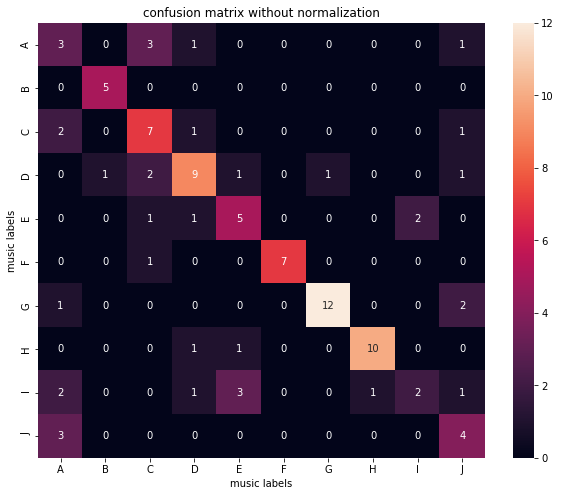

In [25]:
#heatmap of confusion matrix
import numpy as np
#from numpy import linalg as LA 
import seaborn as sn

df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix without normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel("music labels")
plt.ylabel("music labels")

In [26]:
#normalization
total = np.sum(confmat , axis = 1)
confmat = confmat / total[:,None]


In [27]:
confmat

array([[0.375     , 0.        , 0.375     , 0.125     , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.125     ],
       [0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.18181818, 0.        , 0.63636364, 0.09090909, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.09090909],
       [0.        , 0.06666667, 0.13333333, 0.6       , 0.06666667,
        0.        , 0.06666667, 0.        , 0.        , 0.06666667],
       [0.        , 0.        , 0.11111111, 0.11111111, 0.55555556,
        0.        , 0.        , 0.        , 0.22222222, 0.        ],
       [0.        , 0.        , 0.125     , 0.        , 0.        ,
        0.875     , 0.        , 0.        , 0.        , 0.        ],
       [0.06666667, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.8       , 0.        , 0.        , 0.13333333],
       [0.        , 0.        , 0.       

(10.0, 0.0)

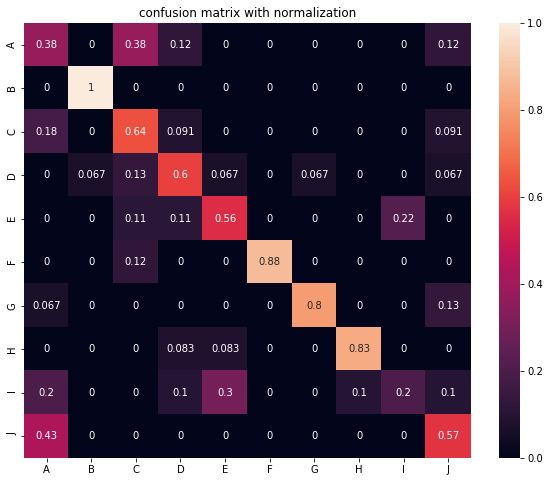

In [28]:
df_cm = pd.DataFrame(confmat , index = [i for i in "ABCDEFGHIJ"] , columns = [i for i in "ABCDEFGHIJ"])
plt.figure(figsize = (10,8))
plt.title('confusion matrix with normalization')
ax = sn.heatmap(df_cm, annot= True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)